# Predicting Heart Failure

#### *Pedro Arrizon, Justin Callahan, Jennice Herrera, Doeun(Leah) Lee, Abhinav Mugunda*

##### [Github](https://github.com/P-Arrizon/SDS322E_Project)

# The Goal

The goal for this project is to try and use statistical methods and data science methods to try and dicover some realtionships within our data that can help us realize any signs of heart complications given some data. 

In [91]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn import tree      
from sklearn.model_selection import train_test_split                              # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                              # for accessing tree information
from sklearn import metrics                                 # measures to check our models
from sklearn.tree import export_graphviz                    # graphical visualization of trees
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0

from sklearn.model_selection import cross_val_score         # cross validation methods
from sklearn.tree import DecisionTreeRegressor              # decision tree method
from sklearn import model_selection
from sklearn.ensemble import BaggingRegressor               # bagging tree method
from sklearn.ensemble import RandomForestClassifier
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
import geostatspy.GSLIB as GSLIB                            # geostatistics and spatial methods

# User Defined Functions

In [72]:
def plot_corr(dataframe,size=10):                               # plots a graphical correlation matrix 
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')

def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return Z

def display_barchart(data, var, label):
    #calculates the count of patients in each catagory vs heart disease
    grp = data.groupby([var, label])[var].count().unstack().reset_index()
    labels = list(grp.iloc[:, 0].values)
    no_dis = list(grp.iloc[:, 1].values) #no heart disease patients
    yes_dis = list(grp.iloc[:, 2].values) #heart disease patient
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, no_dis, width, label='Healthy', color = 'green')
    rects2 = ax.bar(x + width/2, yes_dis, width, label='Heart Disease', color = 'red')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Patients')
    ax.set_xlabel(var)
    ax.set_title('Heart Disease by ' + var)
    ax.set_xticks(x) # values
    ax.set_xticklabels(labels) # labels
    ax.legend()

    fig.tight_layout()
    plt.show()
    

# The data:

In [67]:
url = 'https://raw.githubusercontent.com/P-Arrizon/SDS322E_Project/main/heart.csv'
df = pd.read_csv(url, error_bad_lines=False)

cat_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

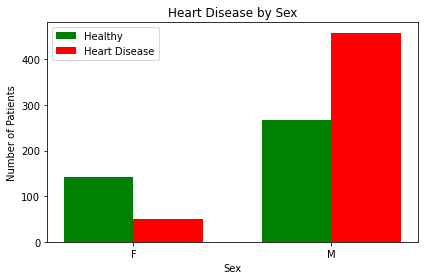

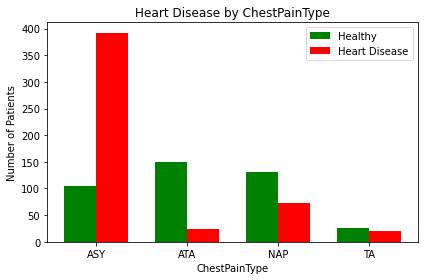

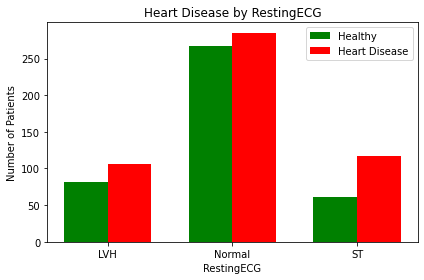

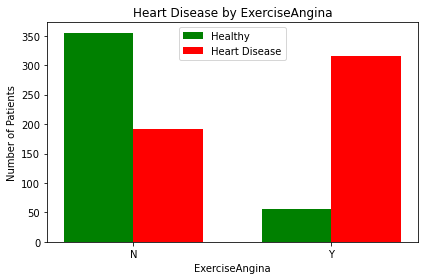

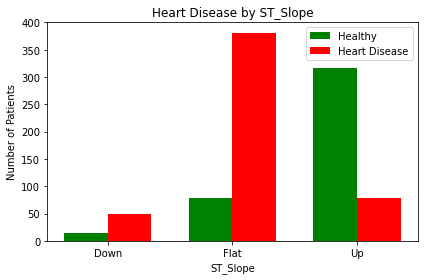

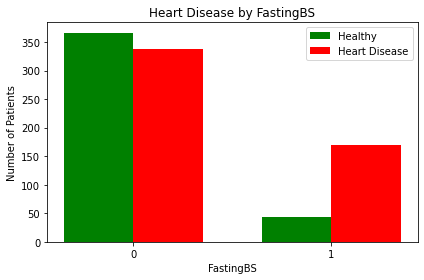

In [73]:

for var in cat_vars:
    display_barchart(df, var, 'HeartDisease')


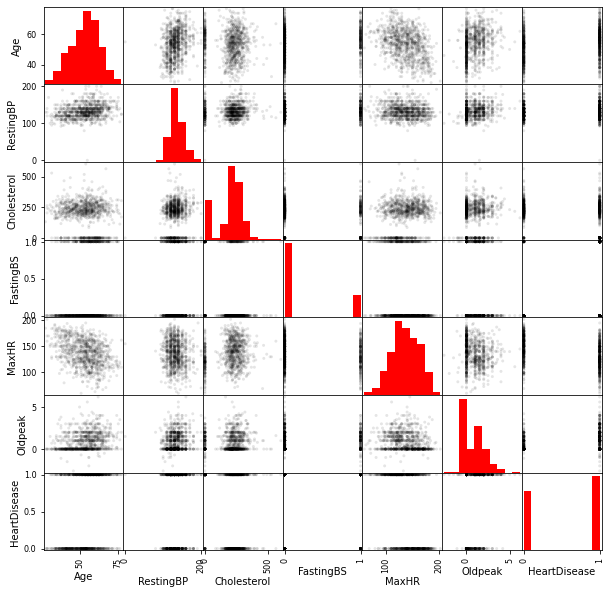

In [76]:
pd_plot.scatter_matrix(df, alpha = 0.1,                # pandas matrix scatter plot
    figsize=(10, 10),color = 'black', hist_kwds={'color':['red']})
plt.show()

<ipython-input-82-b41150d22bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChestPainType[df.ChestPainType == 'ASY'] = 1
<ipython-input-82-b41150d22bd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ChestPainType[df.ChestPainType != 'ASY'] = 0
<ipython-input-82-b41150d22bd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sex[df.Sex == 'M'] = 1
<ipython-input-82-b41150d22bd5>:4: SettingWithCopyWarning: 
A value is try

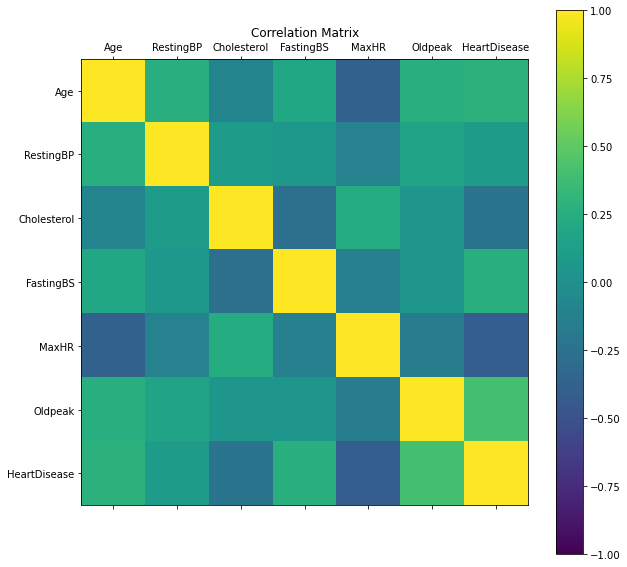

In [82]:
df.ChestPainType[df.ChestPainType == 'ASY'] = 1
df.ChestPainType[df.ChestPainType != 'ASY'] = 0
df.Sex[df.Sex == 'M'] = 1
df.Sex[df.Sex != 'M'] = 0
df.ST_Slope[df.ST_Slope == 'Flat'] = 1
df.ST_Slope[df.ST_Slope != 'Flat'] = 0


In [88]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ST_Slope
0,40,0,0,140,289,0,172,0
1,49,0,0,160,180,0,156,0
2,37,0,0,130,283,0,98,0
3,48,0,0,138,214,0,108,0
4,54,0,0,150,195,0,122,0
...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,132,0
914,68,0,0,144,193,1,141,0
915,57,0,0,130,131,0,115,0
916,57,0,0,130,236,0,174,0


In [86]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',"FastingBS",'MaxHR','ST_Slope']]
y = df['HeartDisease']

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [108]:
seed = 73093                                                # set the random forest hyperparameters
max_depth = 7
num_tree = 3
max_features = 3

clf = RandomForestClassifier(max_depth=max_depth, random_state=seed,n_estimators=num_tree, max_features=max_features)

clf.fit(x_train,y_train)           # train the model with training data 

# prediction on test set
y_pred=clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.691304347826087


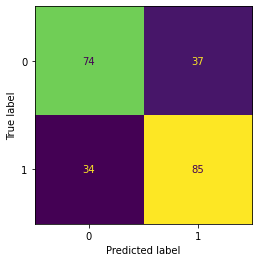

In [109]:
plt = metrics.plot_confusion_matrix(clf, x_test, y_test, colorbar = False)

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')